<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-MachineLearning/blob/main/Machine%20learning%20projects/Cancer_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cancer DataSet**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [86]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/Cancer_Data.csv'

In [87]:
data=pd.read_csv(url,sep=',')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [88]:
data.drop(columns='Unnamed: 32',inplace=True)
data.drop(columns='id',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## **EDA**

In [89]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [90]:
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


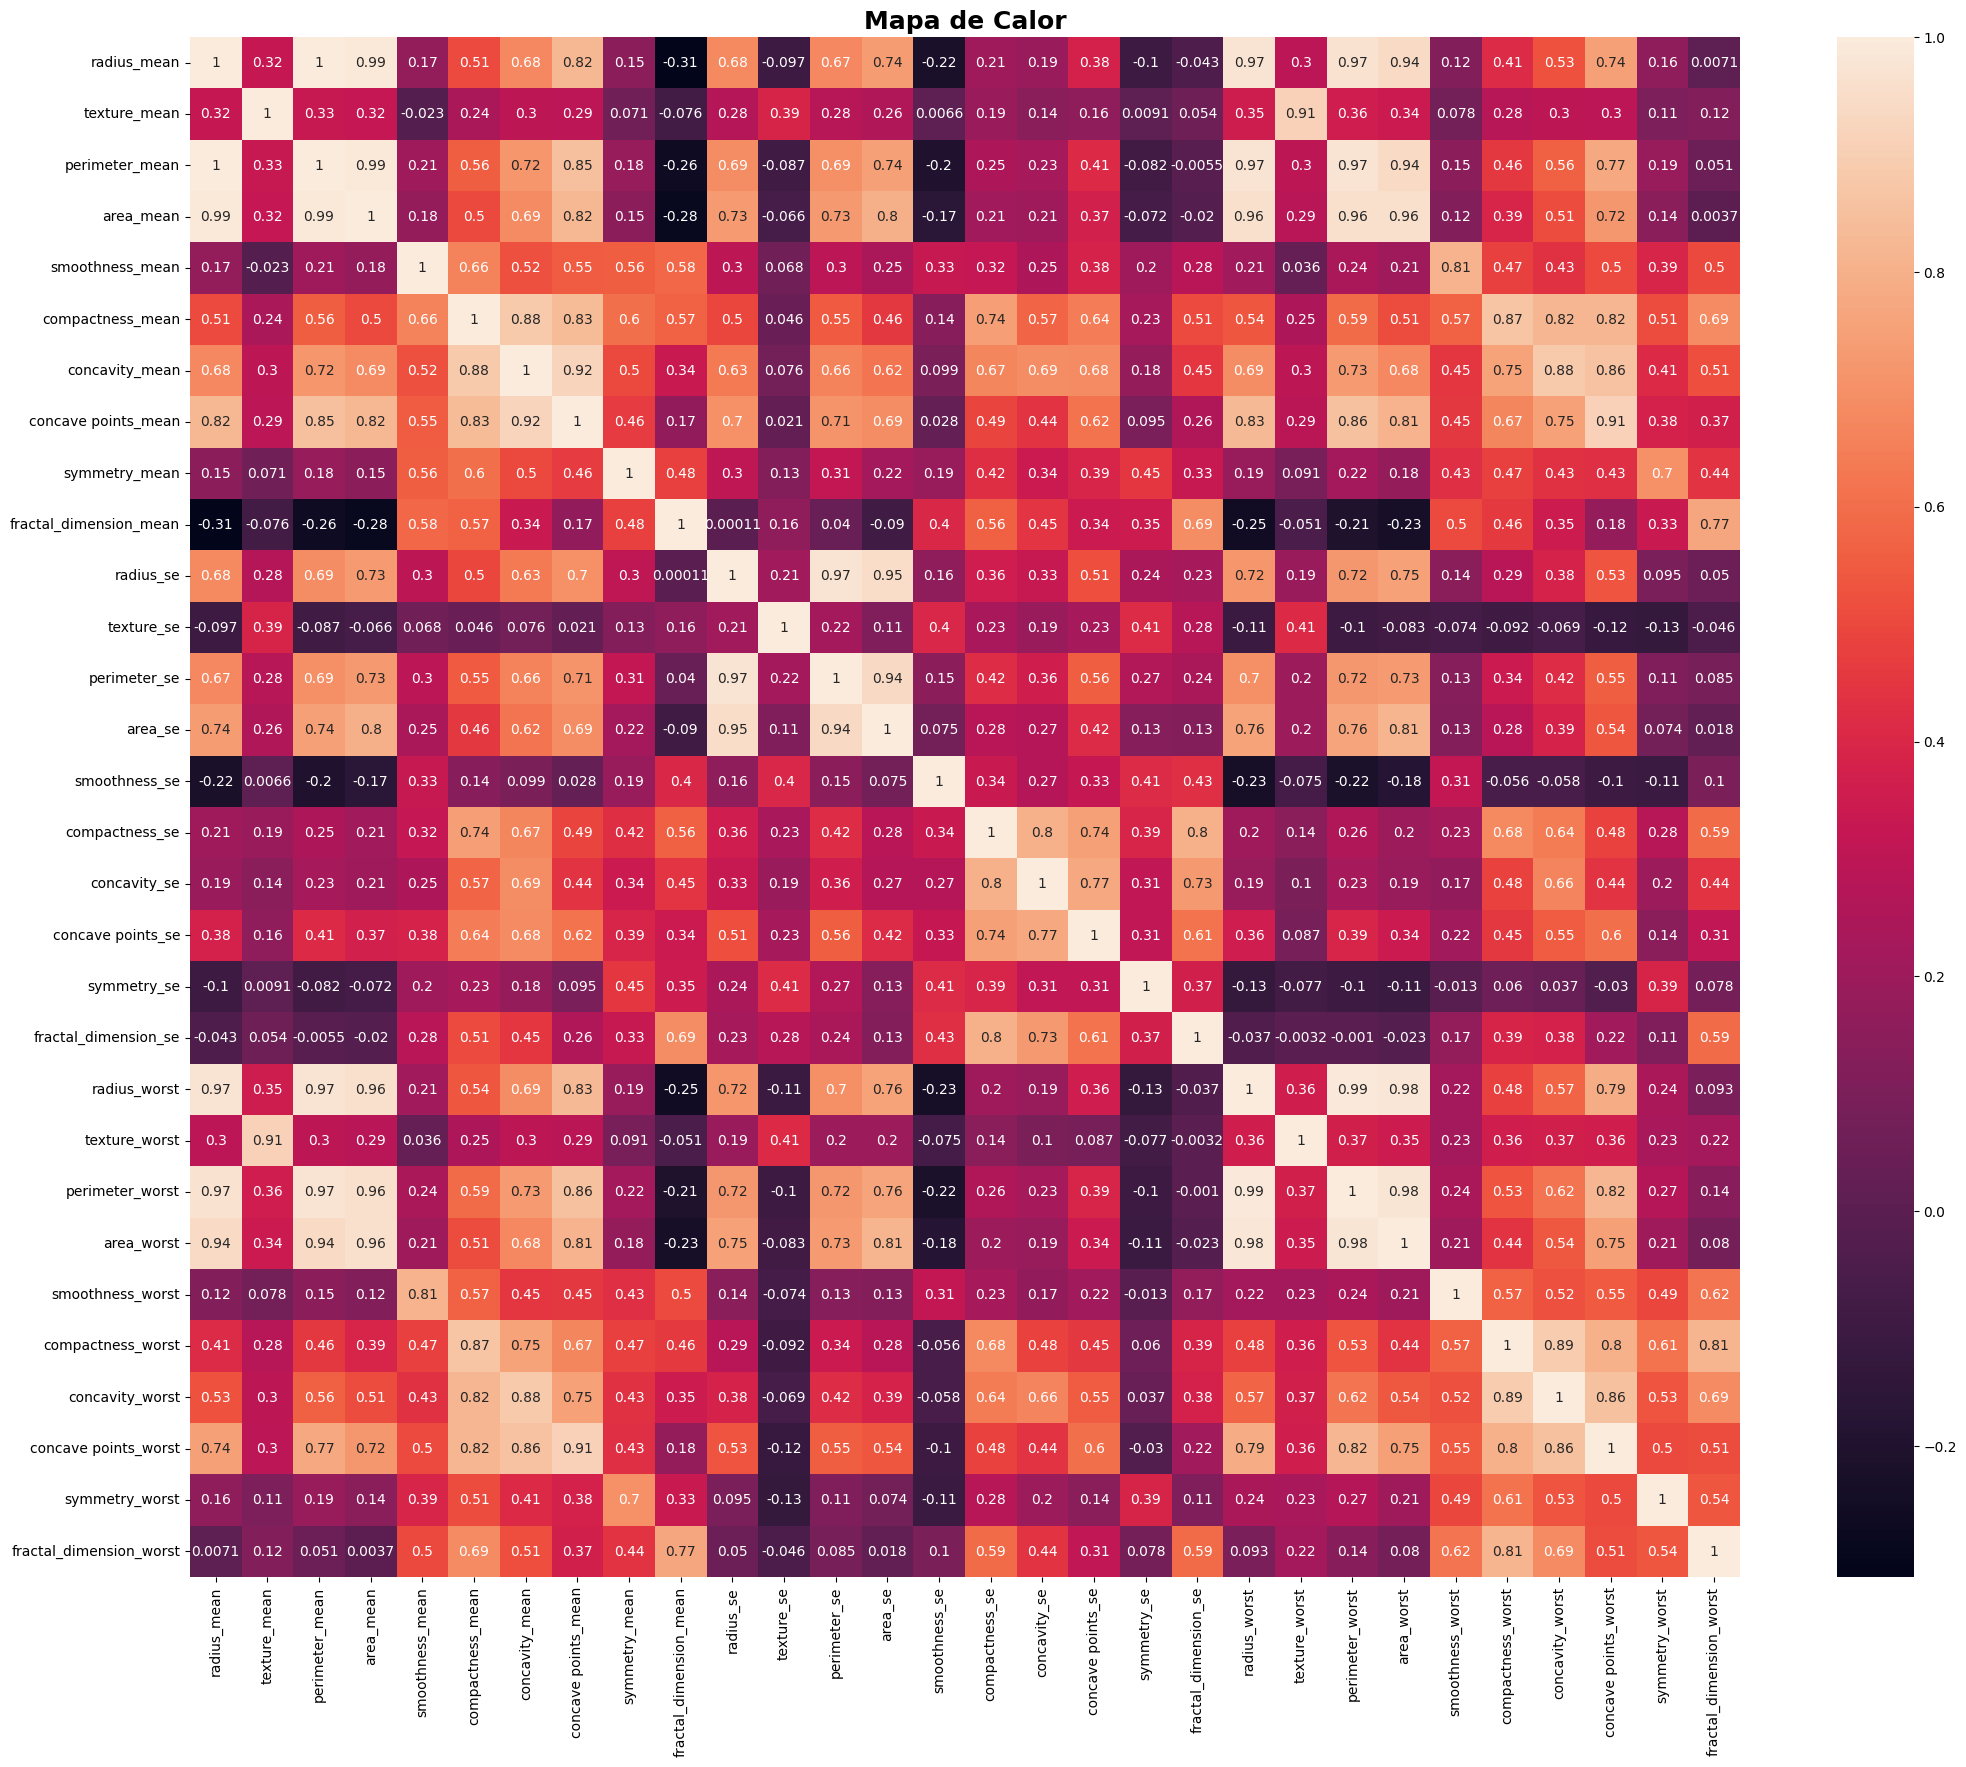

In [91]:
plt.figure(figsize = (25,20))
sns.heatmap(data.corr(),annot=True)
plt.title('Mapa de Calor',fontsize=18,weight='bold')
plt.show()

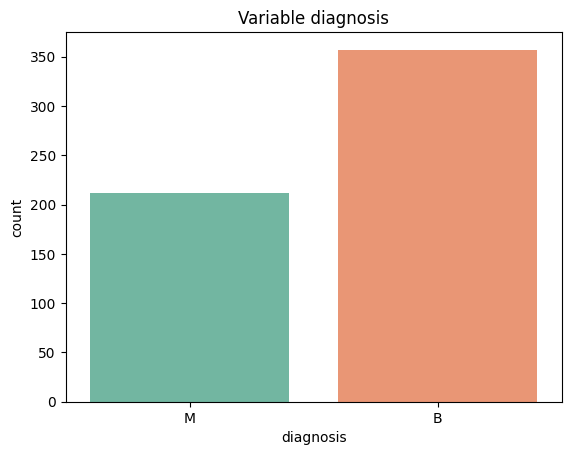

In [92]:
plt.gca().set_title('Variable diagnosis')
sns.countplot(x = 'diagnosis', palette = 'Set2', data = data)
plt.show()

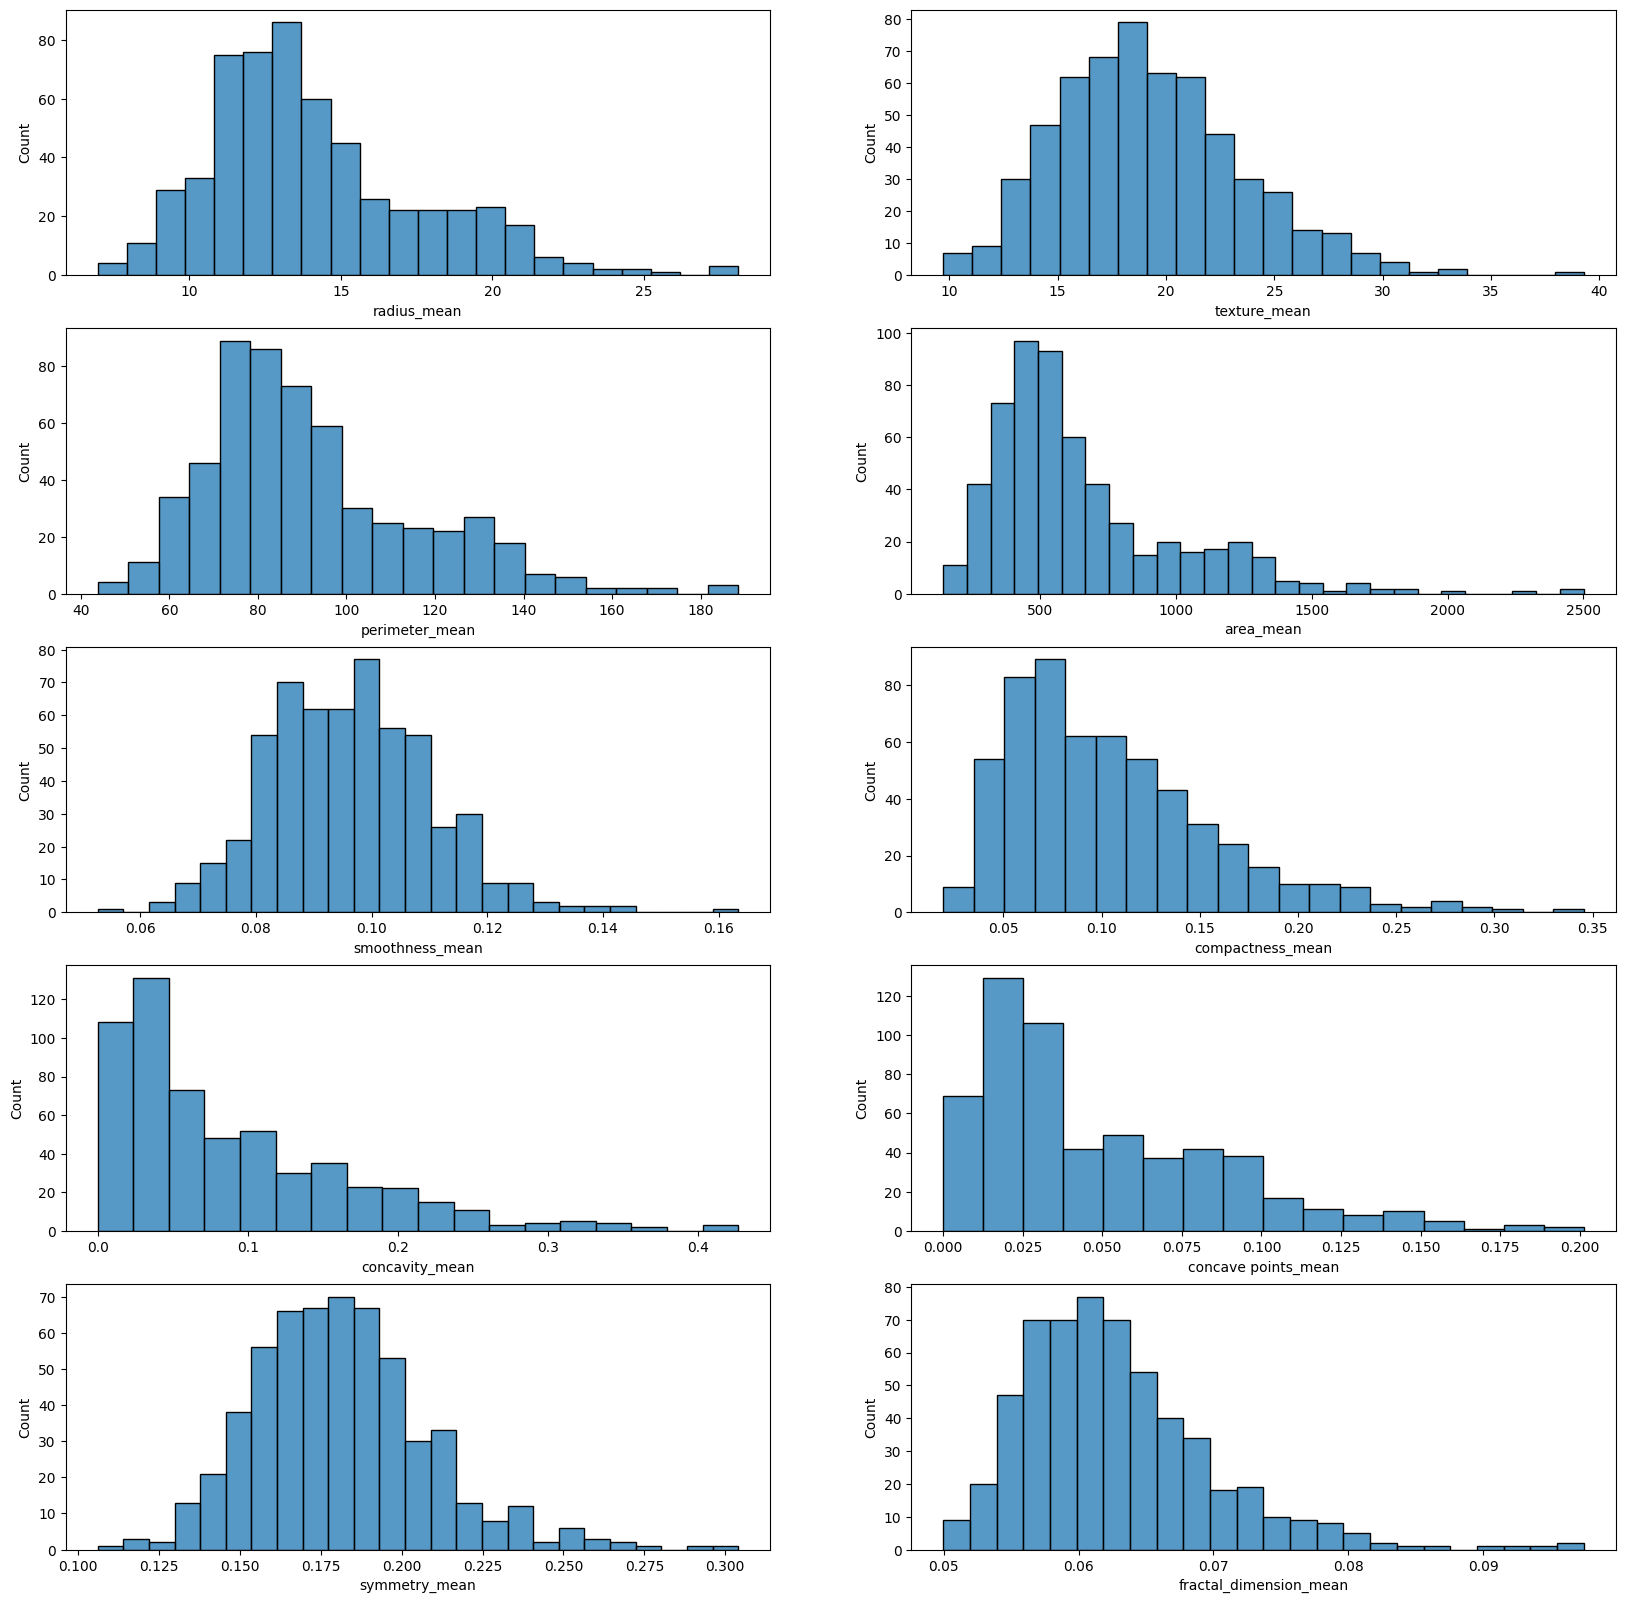

In [93]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = data['radius_mean'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = data['texture_mean'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = data['perimeter_mean'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = data['area_mean'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = data['smoothness_mean'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = data['compactness_mean'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = data['concavity_mean'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = data['concave points_mean'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = data['symmetry_mean'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = data['fractal_dimension_mean'], kde = False)


plt.show()

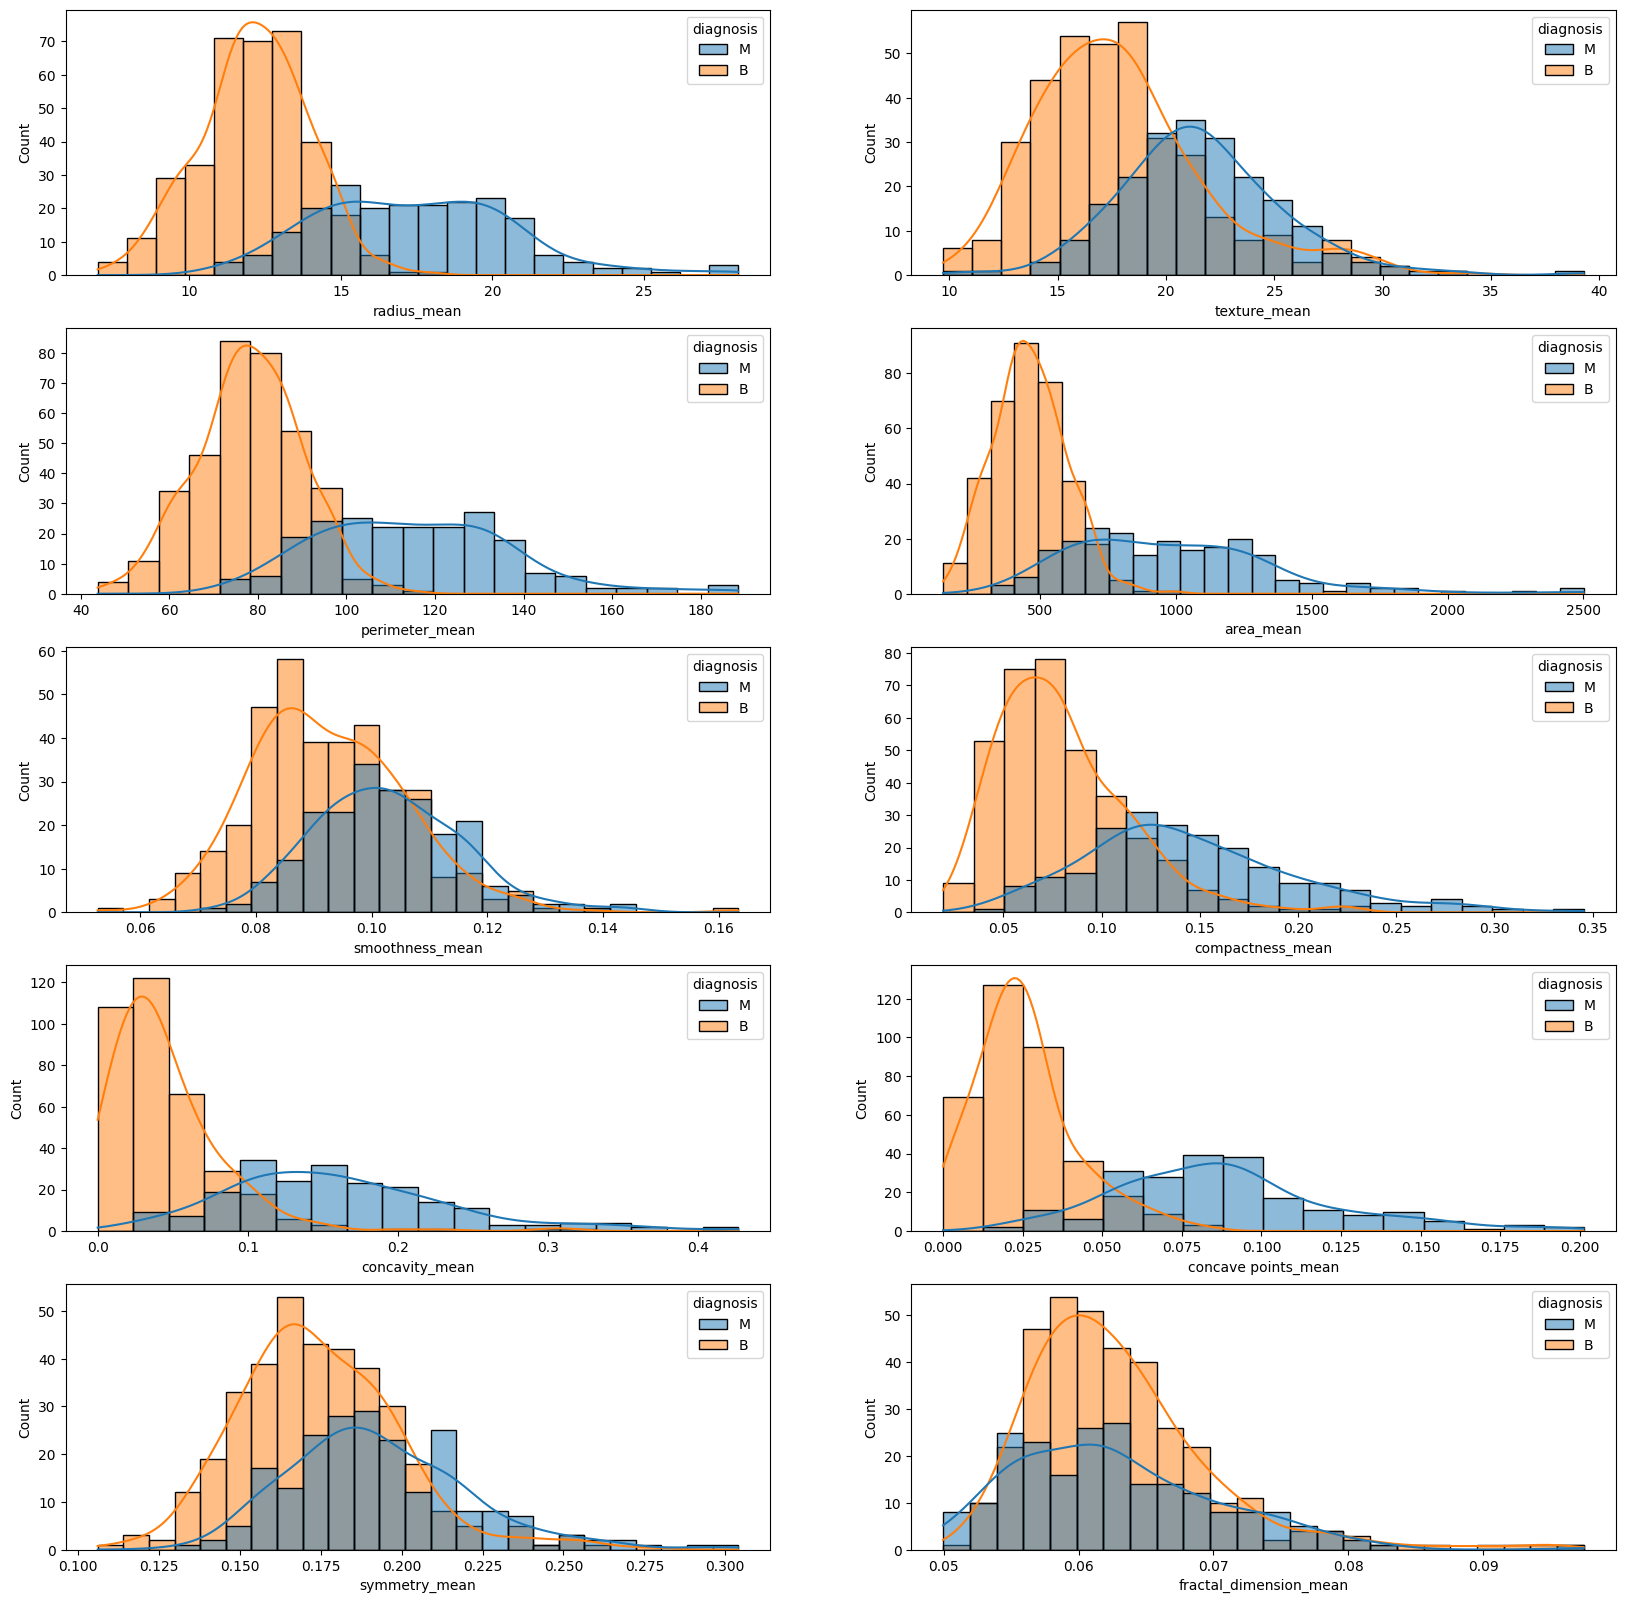

In [94]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = data['radius_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 2)
sns.histplot(x = data['texture_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 3)
sns.histplot(x = data['perimeter_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 4)
sns.histplot(x = data['area_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 5)
sns.histplot(x = data['smoothness_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 6)
sns.histplot(x = data['compactness_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 7)
sns.histplot(x = data['concavity_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 8)
sns.histplot(x = data['concave points_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 9)
sns.histplot(x = data['symmetry_mean'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 10)
sns.histplot(x = data['fractal_dimension_mean'], kde = True,hue=data['diagnosis'])


plt.show()

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

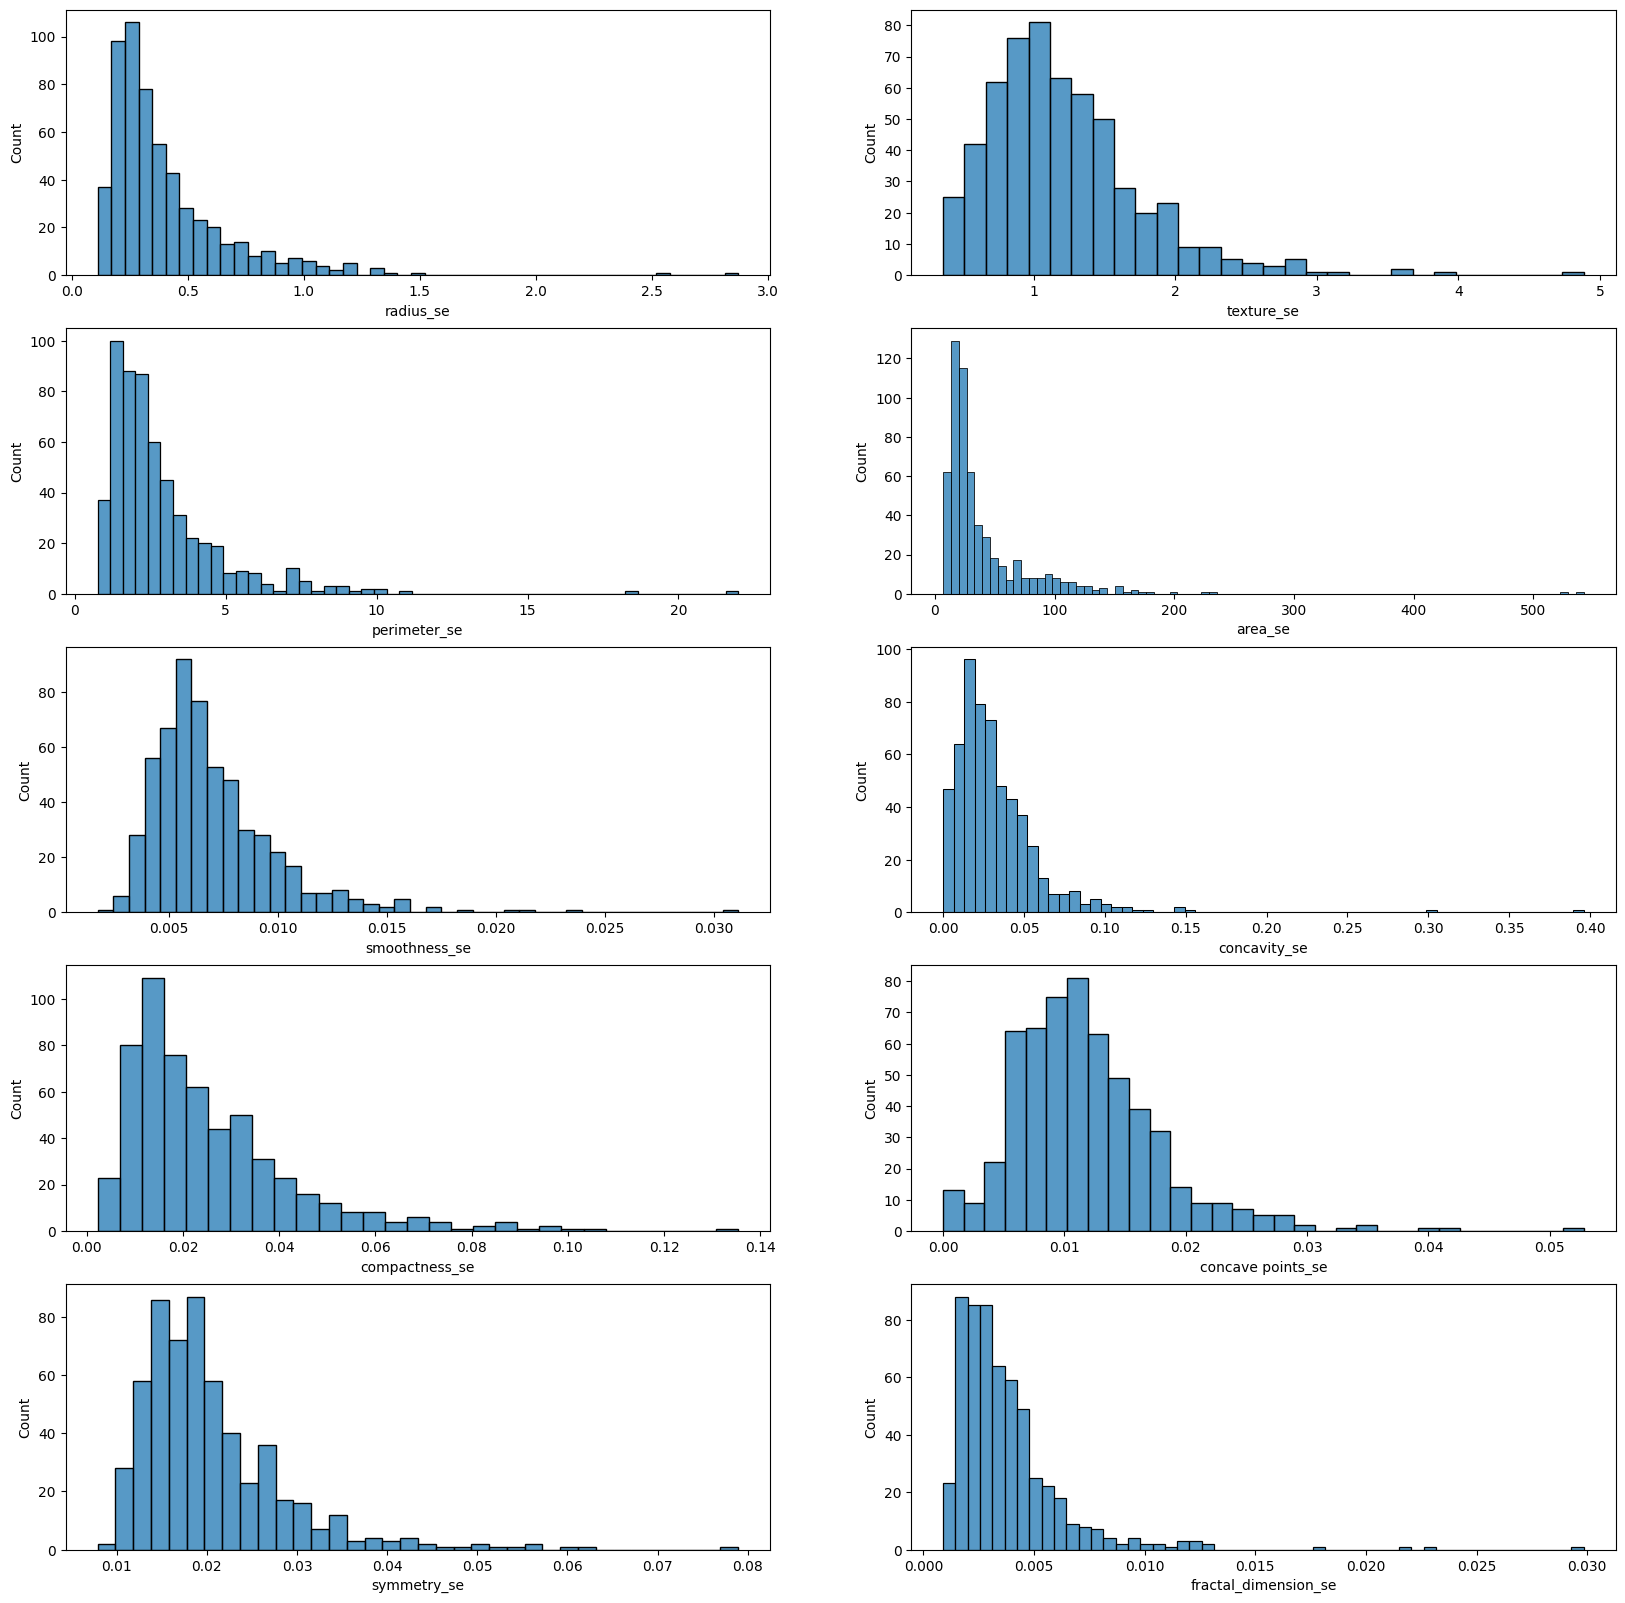

In [95]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = data['radius_se'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = data['texture_se'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = data['perimeter_se'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = data['area_se'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = data['smoothness_se'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = data['concavity_se'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = data['compactness_se'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = data['concave points_se'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = data['symmetry_se'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = data['fractal_dimension_se'], kde = False)

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

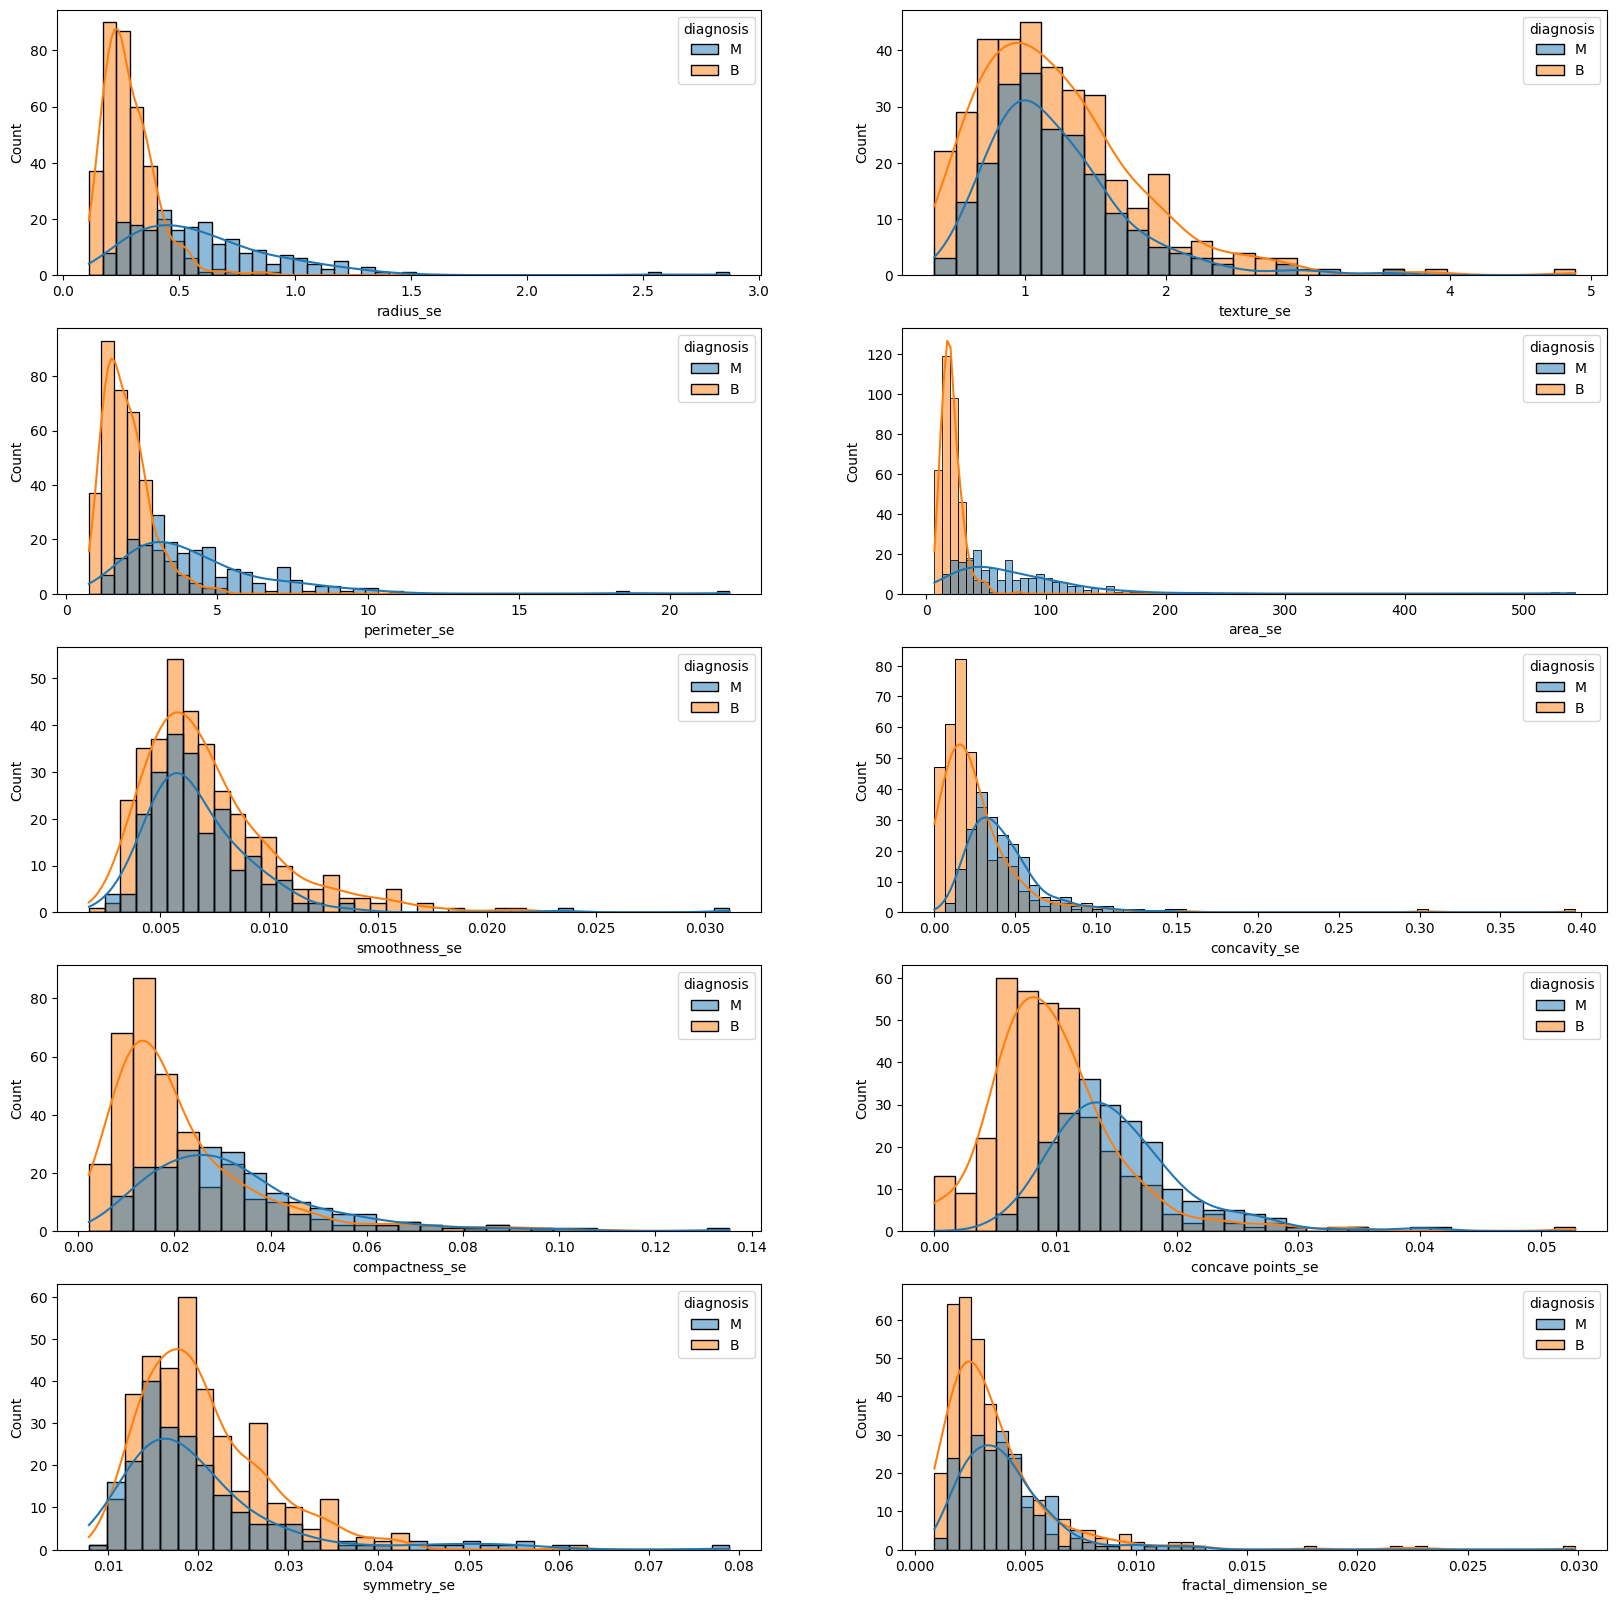

In [96]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = data['radius_se'],  kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 2)
sns.histplot(x = data['texture_se'],  kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 3)
sns.histplot(x = data['perimeter_se'],  kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 4)
sns.histplot(x = data['area_se'],  kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 5)
sns.histplot(x = data['smoothness_se'],kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 6)
sns.histplot(x = data['concavity_se'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 7)
sns.histplot(x = data['compactness_se'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 8)
sns.histplot(x = data['concave points_se'], kde = True,hue=data['diagnosis'] )

plt.subplot(5, 2, 9)
sns.histplot(x = data['symmetry_se'],  kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 10)
sns.histplot(x = data['fractal_dimension_se'],  kde = True,hue=data['diagnosis'])

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

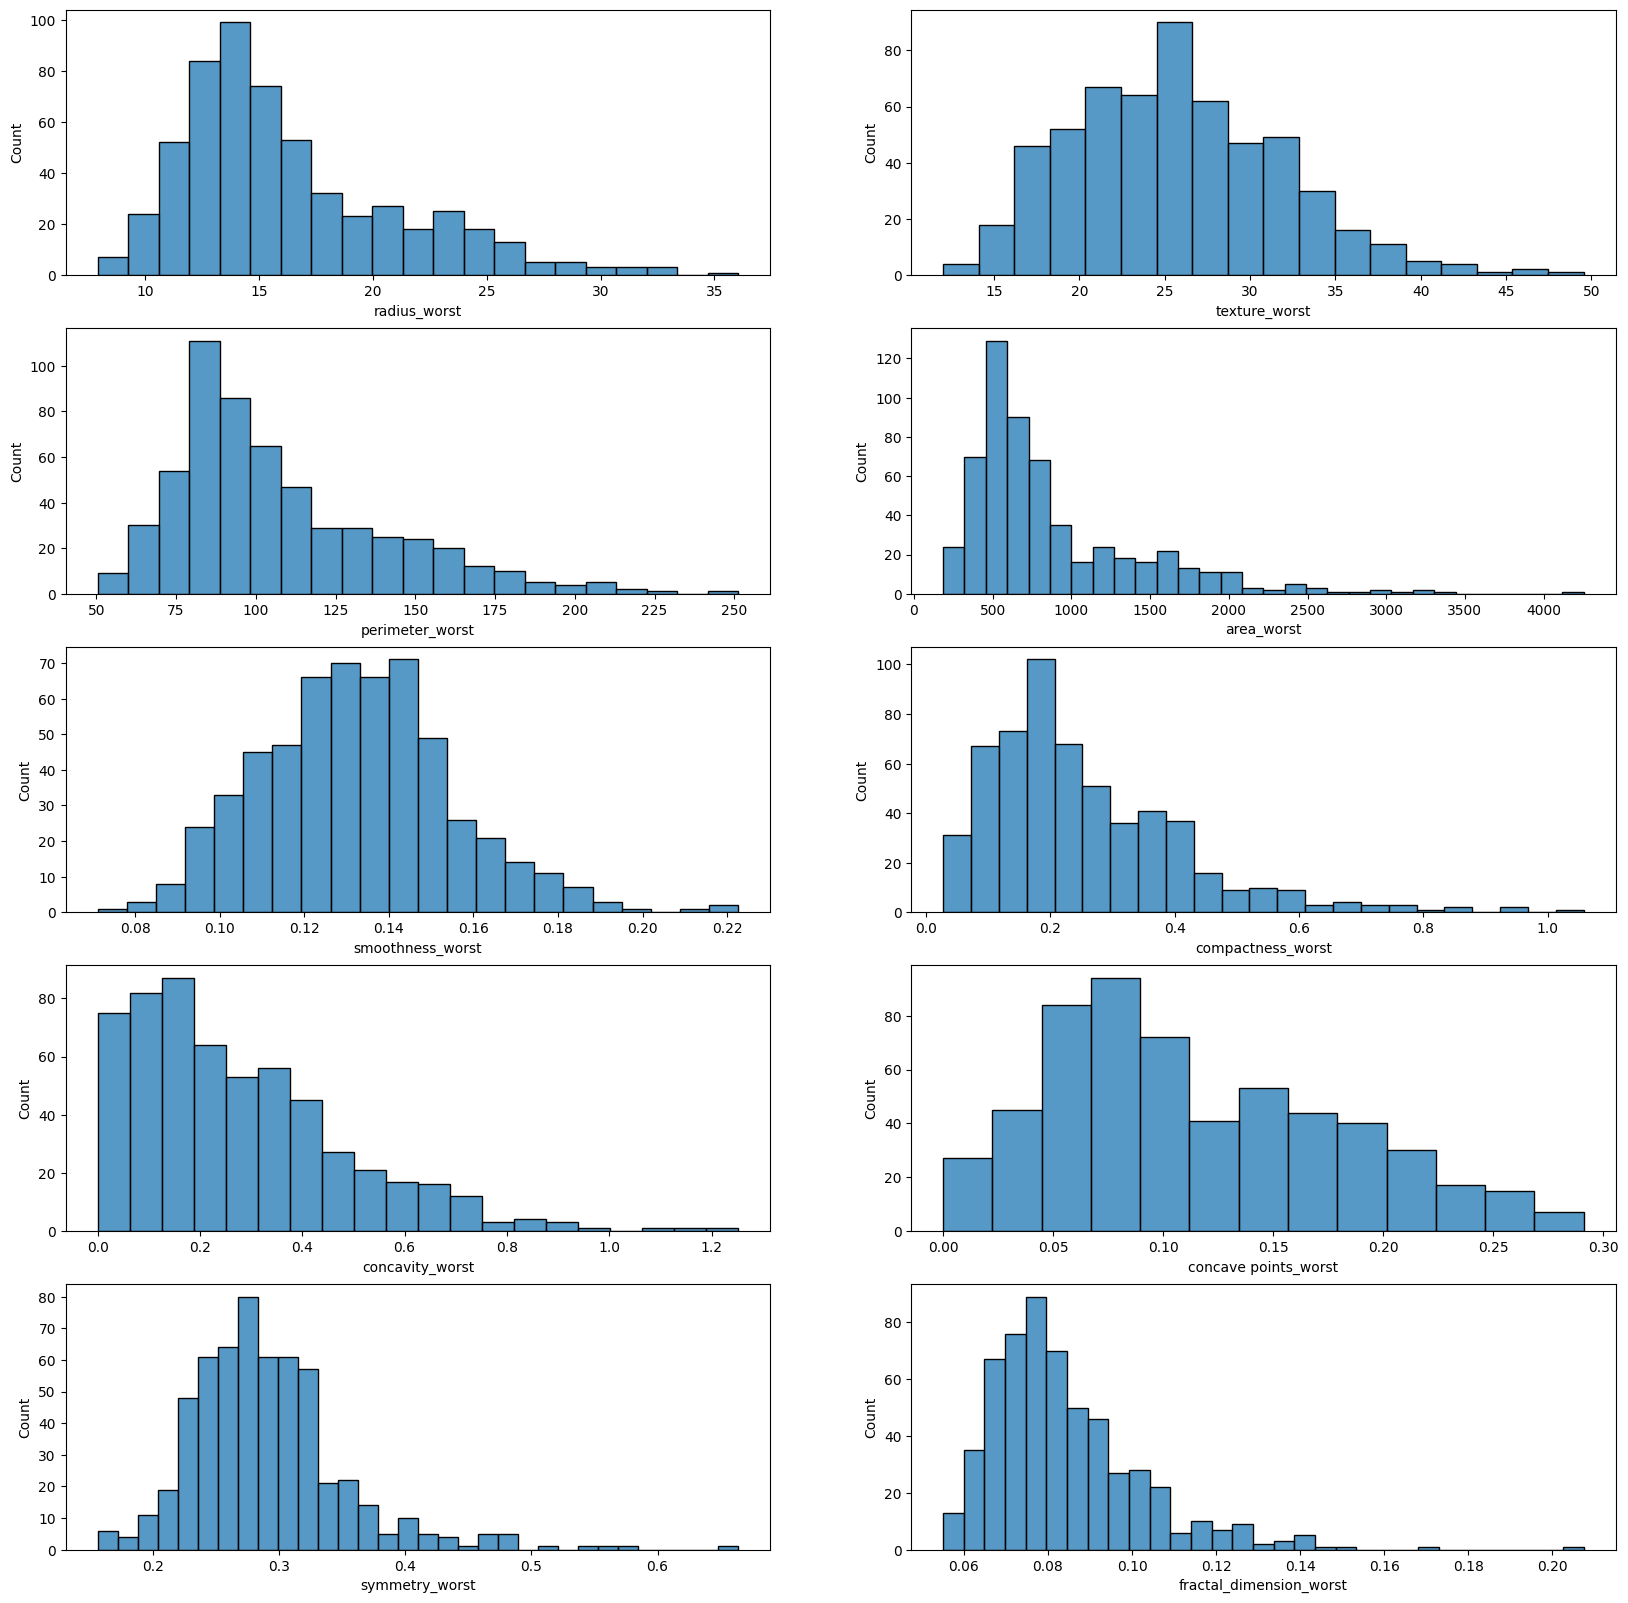

In [97]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = data['radius_worst'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = data['texture_worst'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = data['perimeter_worst'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = data['area_worst'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = data['smoothness_worst'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = data['compactness_worst'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = data['concavity_worst'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = data['concave points_worst'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = data['symmetry_worst'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = data['fractal_dimension_worst'], kde = False)

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

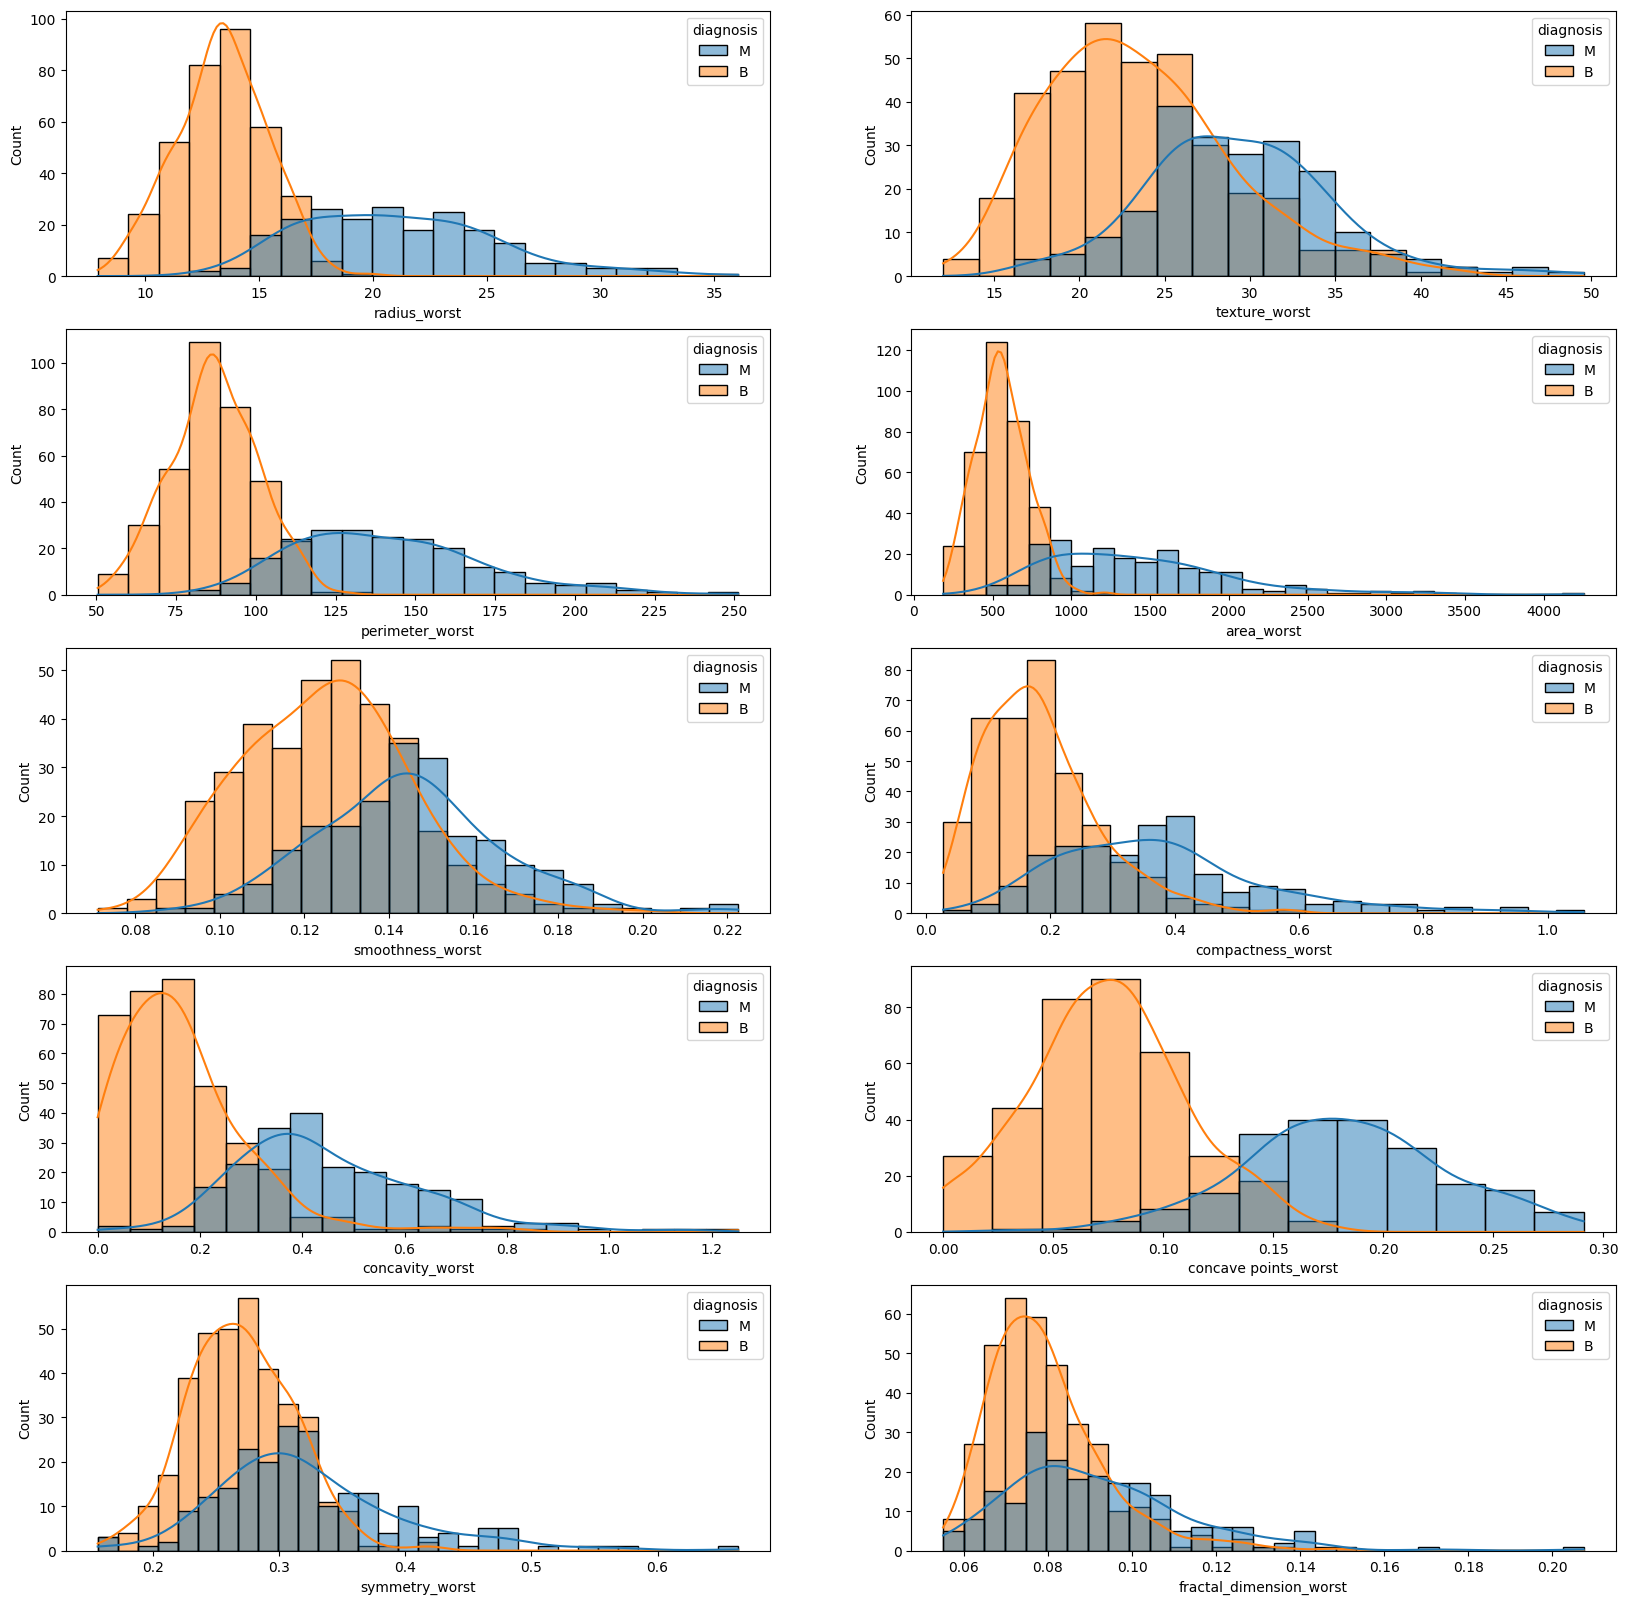

In [98]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = data['radius_worst'],kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 2)
sns.histplot(x = data['texture_worst'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 3)
sns.histplot(x = data['perimeter_worst'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 4)
sns.histplot(x = data['area_worst'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 5)
sns.histplot(x = data['smoothness_worst'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 6)
sns.histplot(x = data['compactness_worst'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 7)
sns.histplot(x = data['concavity_worst'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 8)
sns.histplot(x = data['concave points_worst'], kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 9)
sns.histplot(x = data['symmetry_worst'],kde = True,hue=data['diagnosis'])

plt.subplot(5, 2, 10)
sns.histplot(x = data['fractal_dimension_worst'], kde = True,hue=data['diagnosis'])

In [99]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

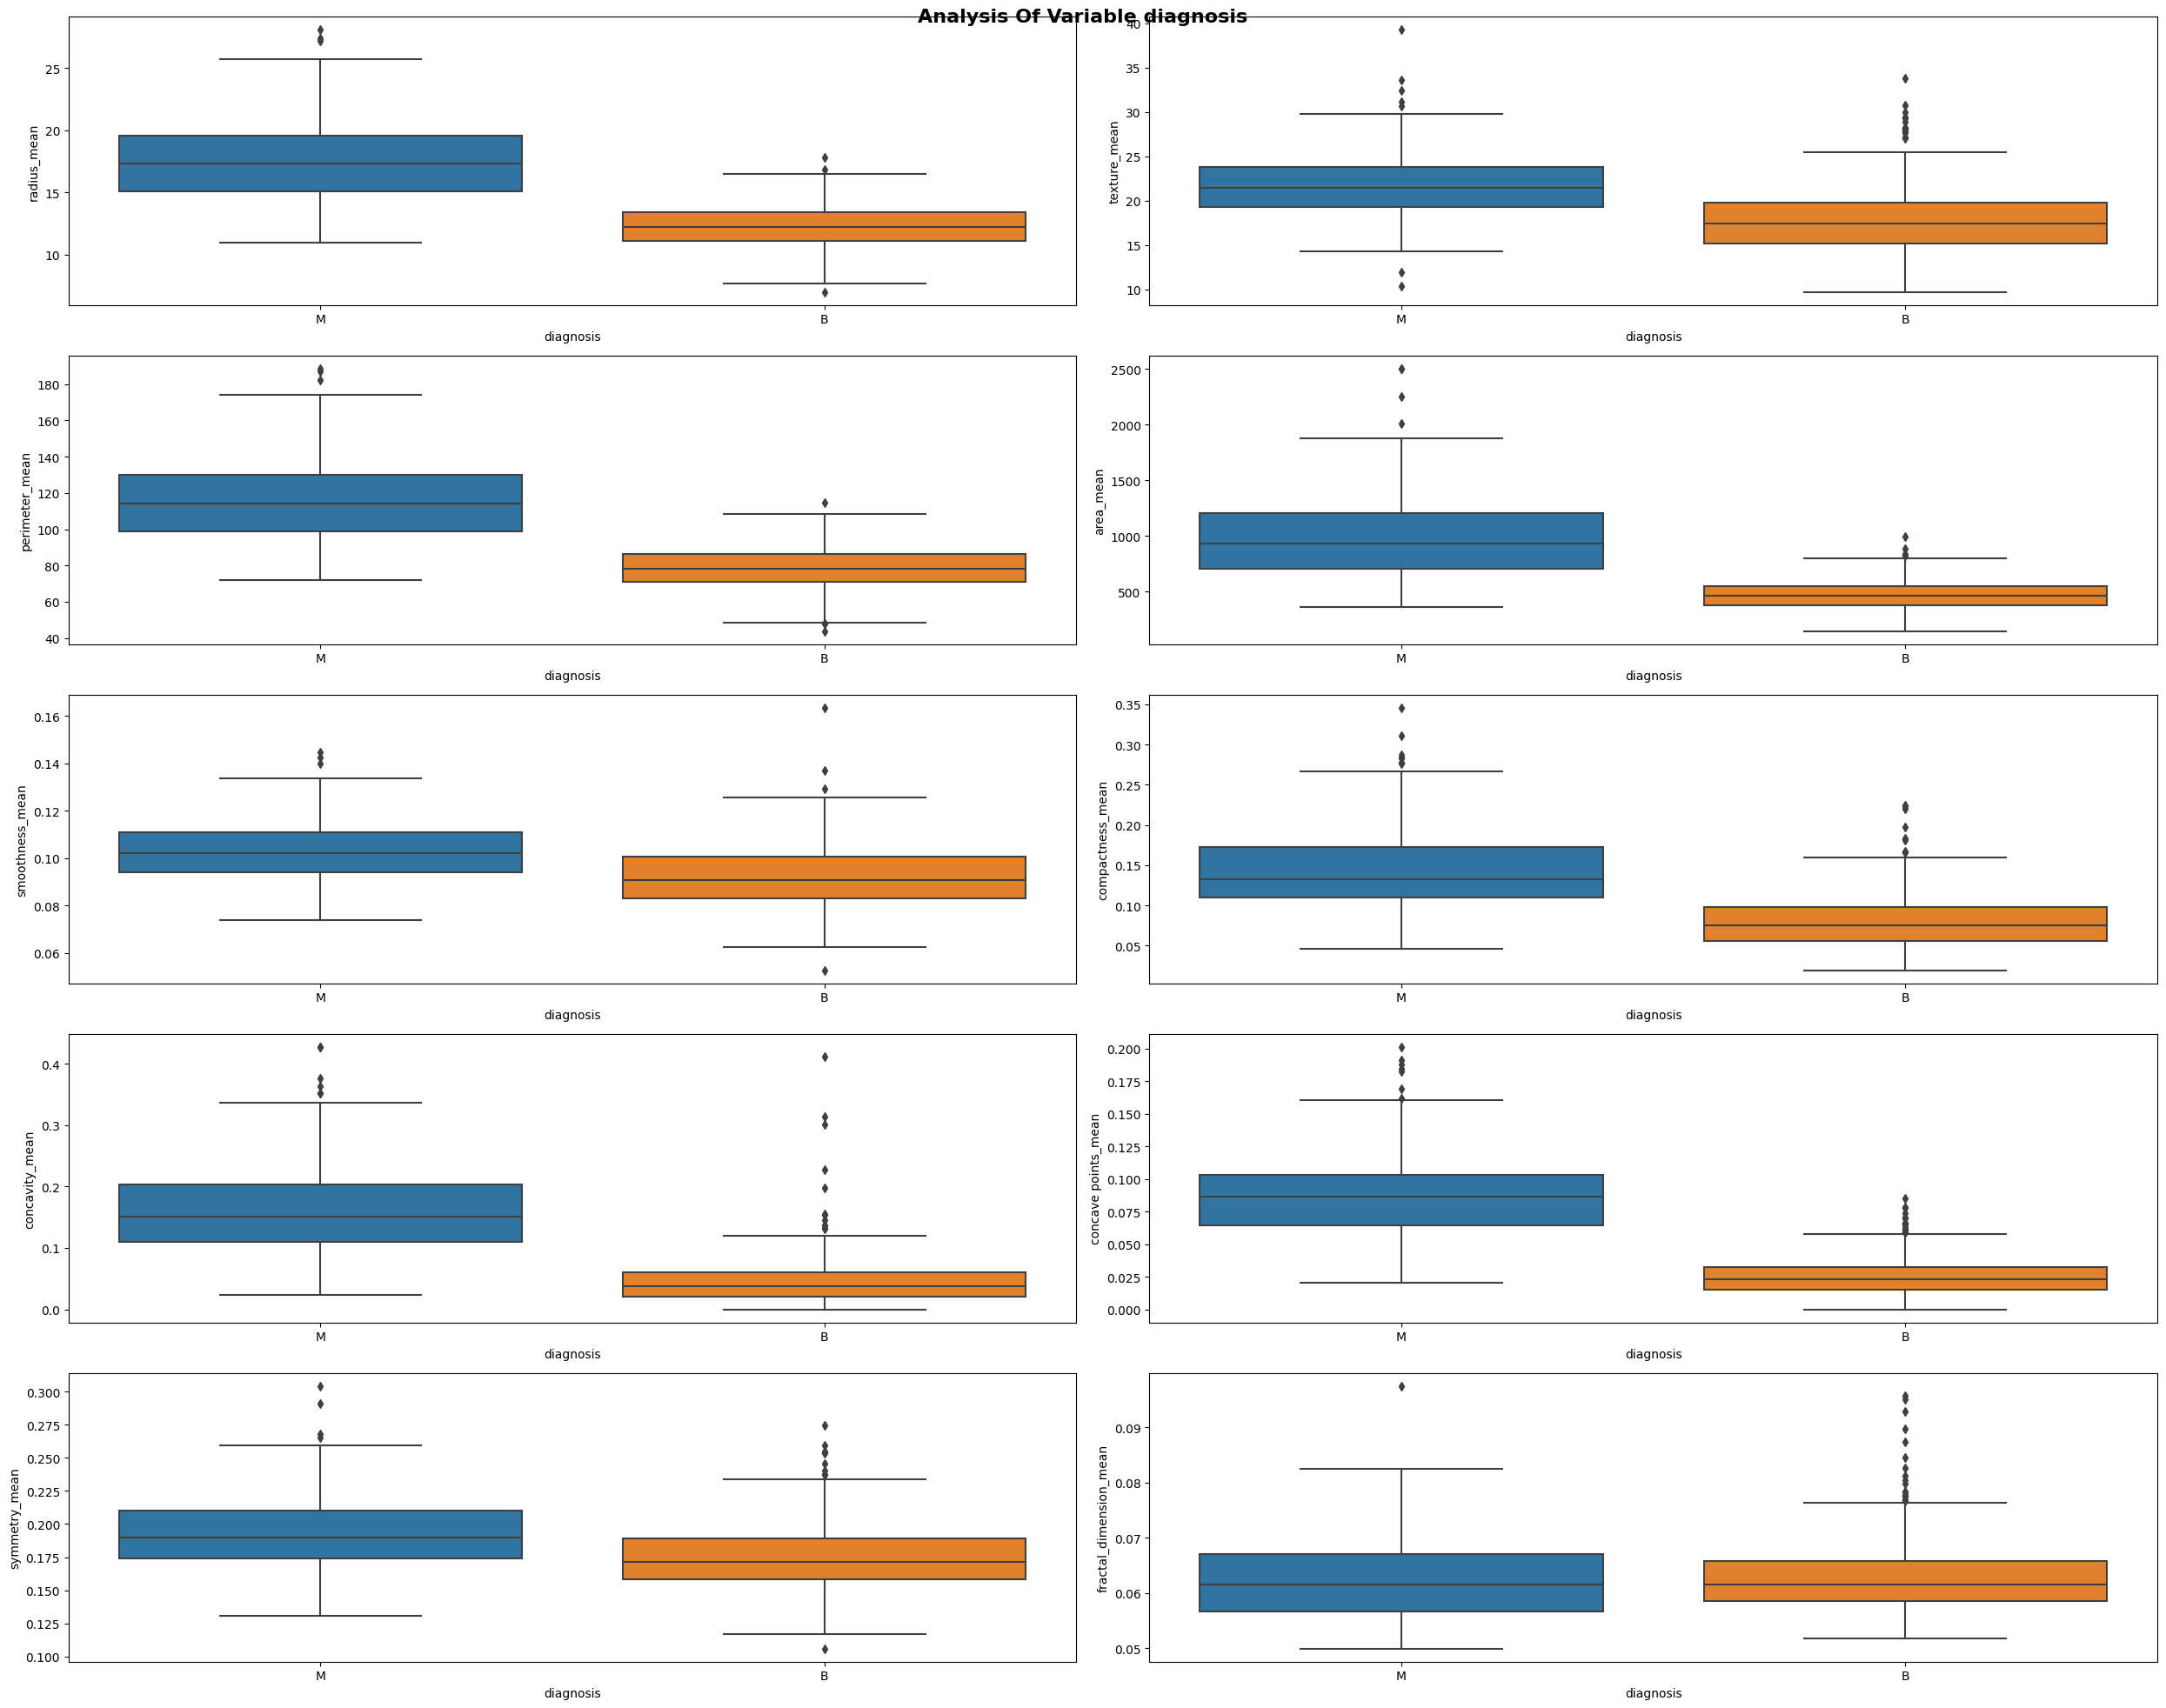

In [101]:
plt.figure(figsize=(25, 20))
plt.suptitle("Analysis Of Variable diagnosis", fontweight="bold", fontsize=16)

variables = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean",
             "smoothness_mean", "compactness_mean", "concavity_mean",
             "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]

for i, var in enumerate(variables, start=1):
    plt.subplot(5, 2, i)
    sns.boxplot(x="diagnosis", y=var, data=data)

plt.tight_layout()
plt.show()

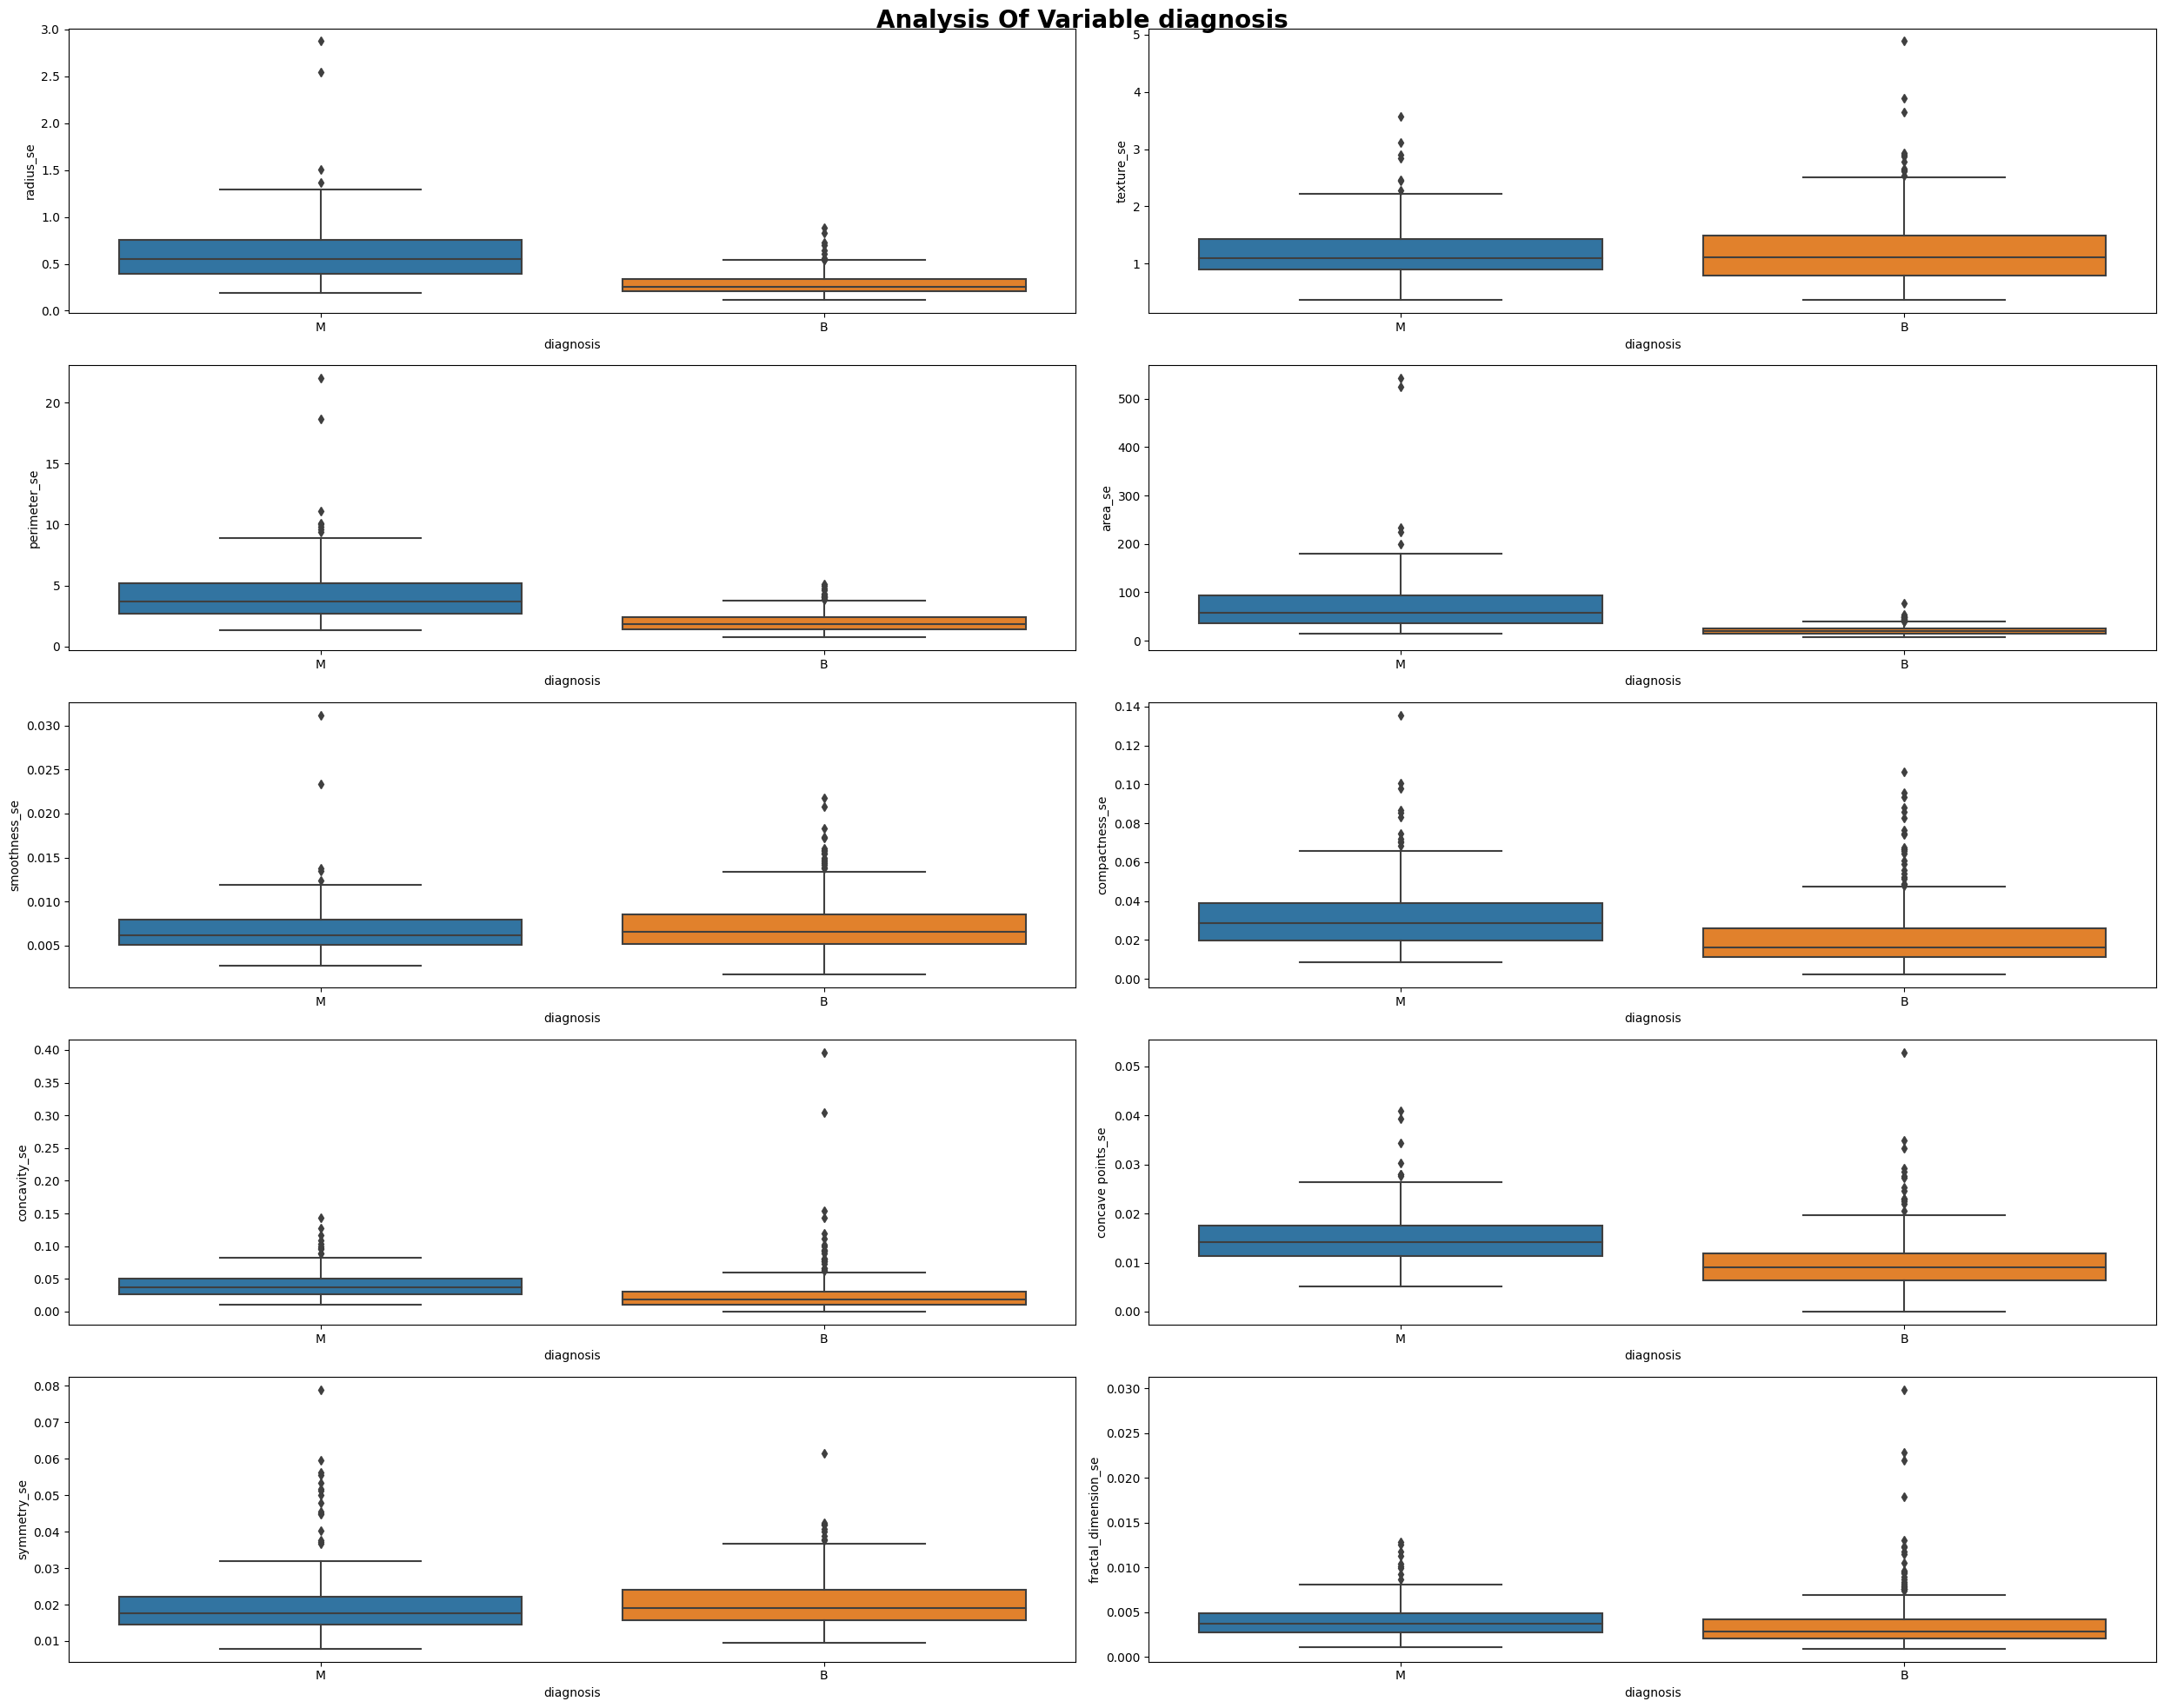

In [102]:

plt.figure(figsize=(25, 20))
plt.suptitle("Analysis Of Variable diagnosis", fontweight="bold", fontsize=20)

variables = ["radius_se", "texture_se", "perimeter_se", "area_se",
             "smoothness_se", "compactness_se", "concavity_se",
             "concave points_se", "symmetry_se", "fractal_dimension_se"]

for i, var in enumerate(variables, start=1):
    plt.subplot(5, 2, i)
    sns.boxplot(x="diagnosis", y=var, data=data)

plt.tight_layout()
plt.show()


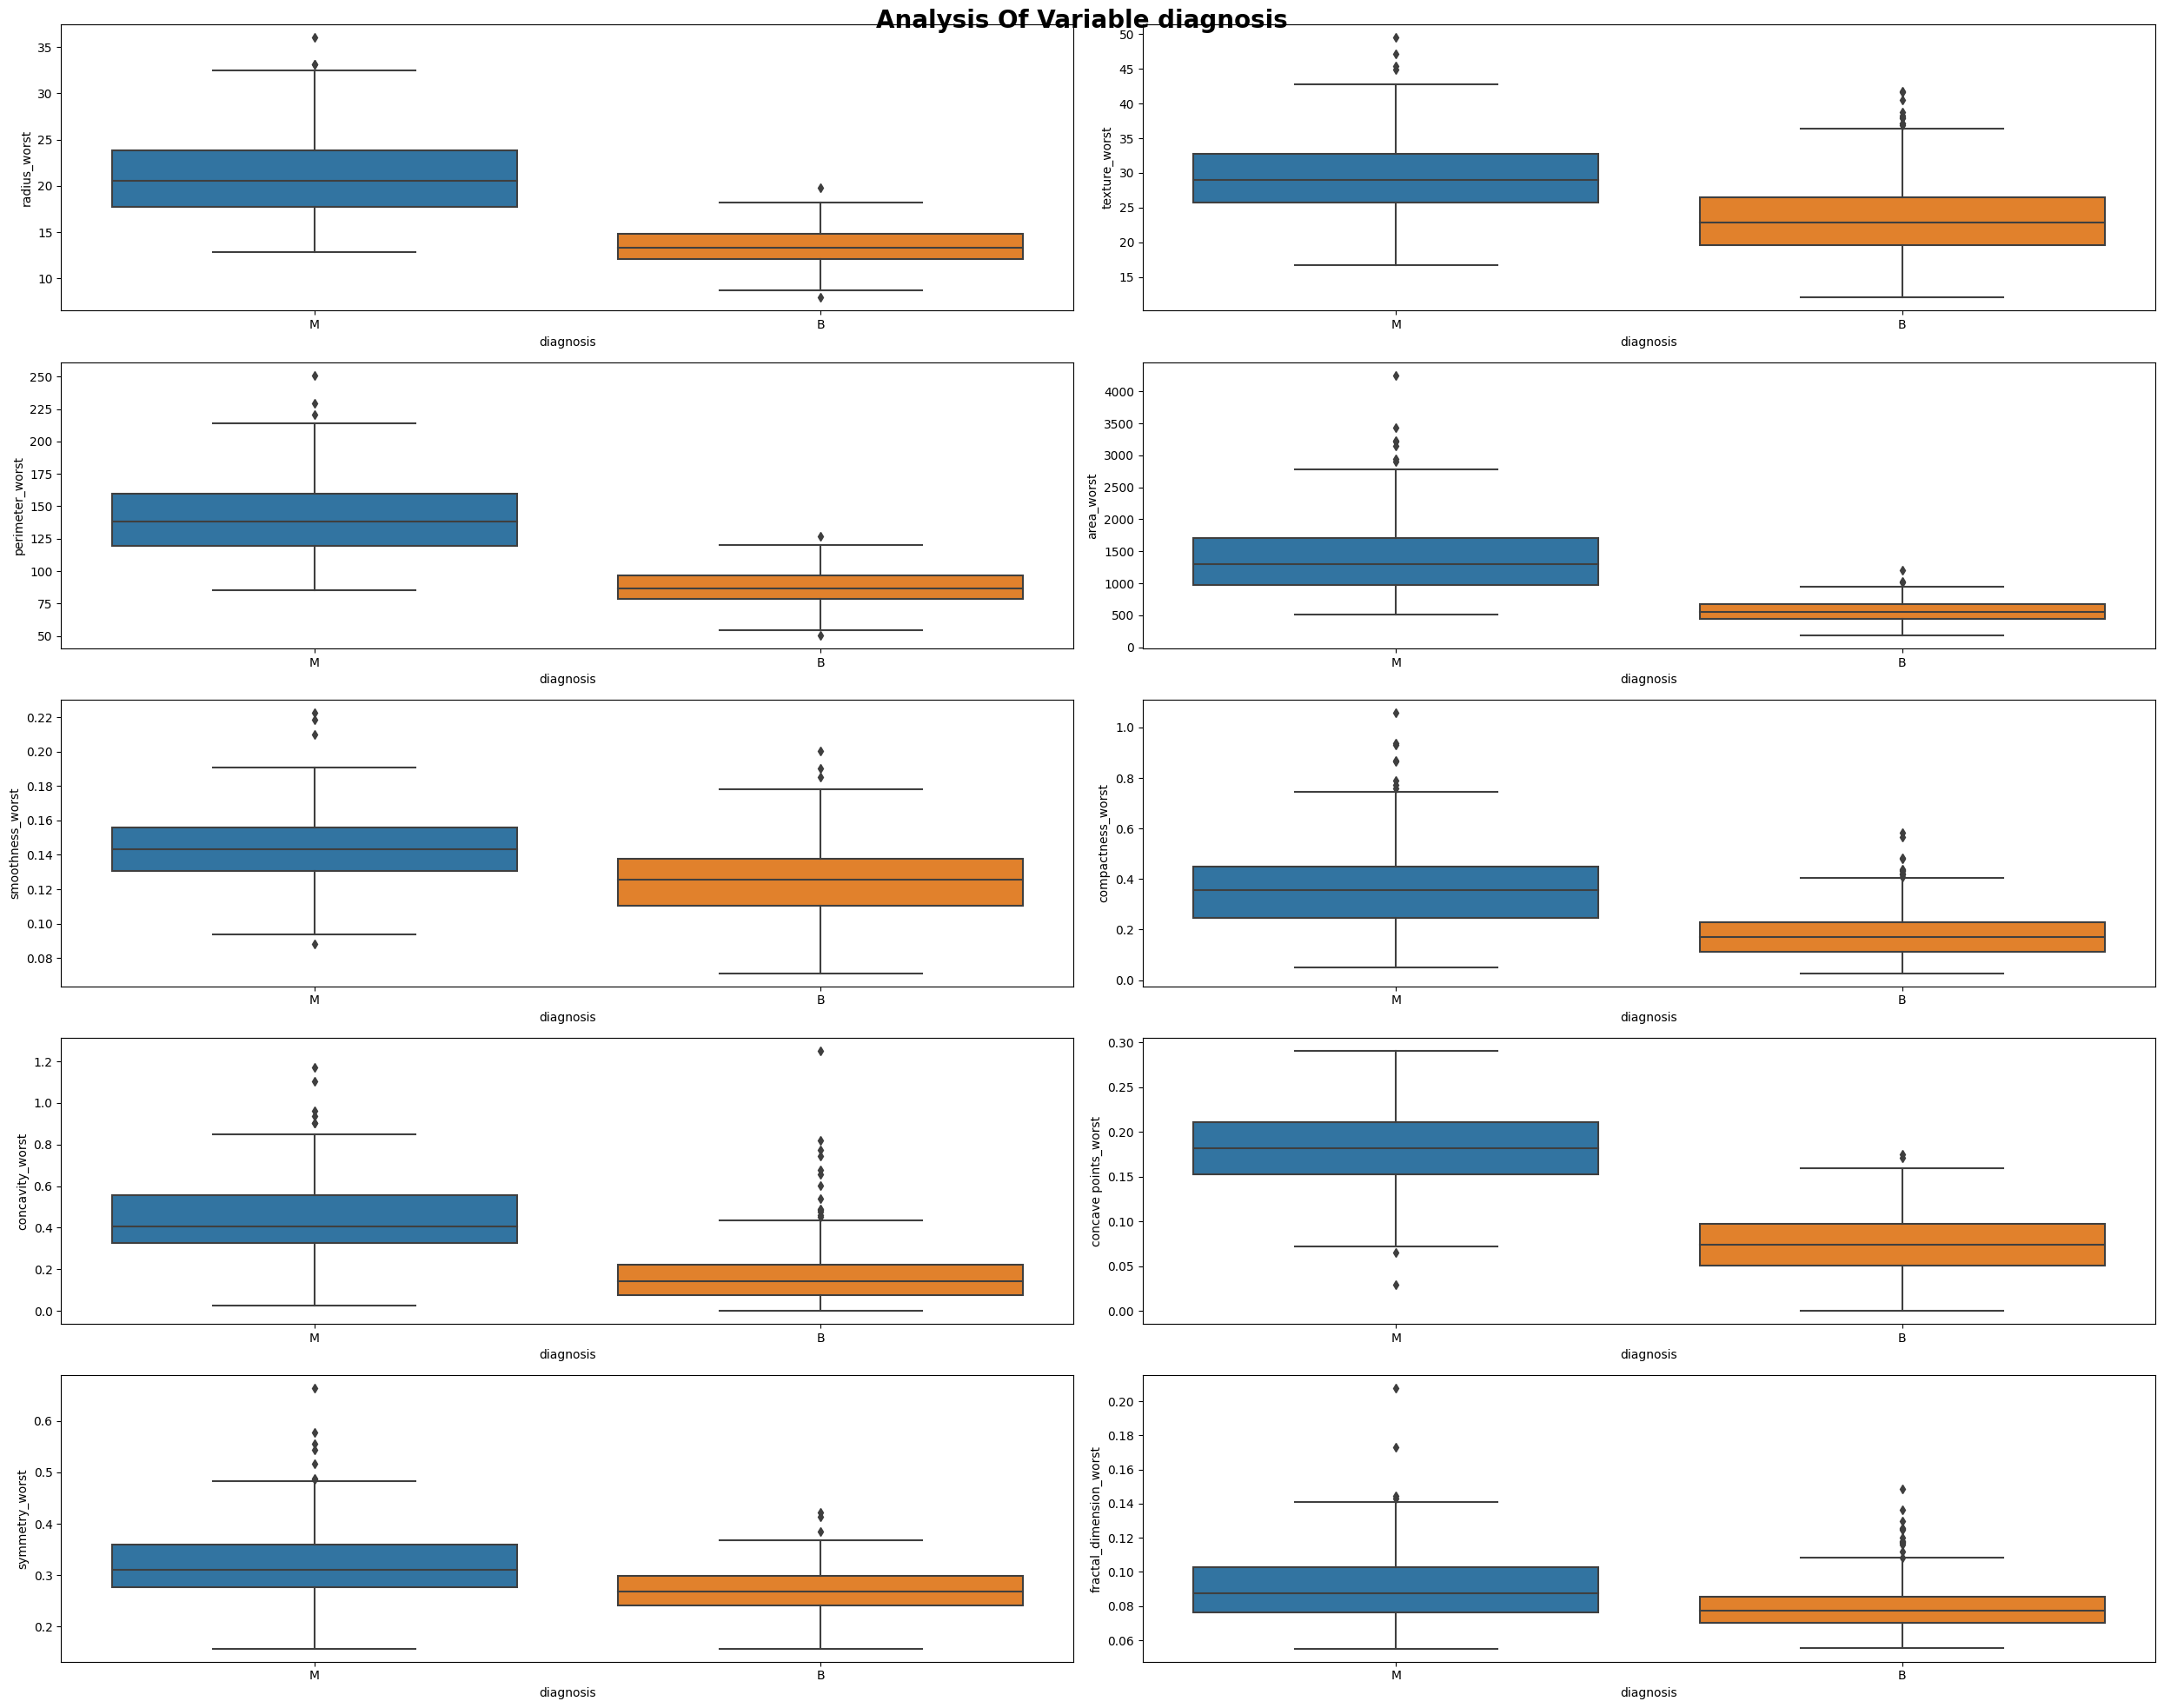

In [103]:
plt.figure(figsize=(25, 20))
plt.suptitle("Analysis Of Variable diagnosis", fontweight="bold", fontsize=20)

variables = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst",
             "smoothness_worst", "compactness_worst", "concavity_worst",
             "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

for i, var in enumerate(variables, start=1):
    plt.subplot(5, 2, i)
    sns.boxplot(x="diagnosis", y=var, data=data)

plt.tight_layout()
plt.show()


## ***Modelos de Machine Learning***

* El LabelEncoder se utiliza en la preparación de datos, especialmente en el preprocesamiento de características categóricas, para convertir etiquetas categóricas en valores numéricos. Esto es útil cuando trabajas con algoritmos de aprendizaje automático que requieren entradas numéricas, como árboles de decisión, regresiones y otros algoritmos.

In [104]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['diagnosis']=label_encoder.fit_transform(data['diagnosis'])

In [105]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [108]:
X=data.drop(columns='diagnosis',axis=1)
X=X.values

In [109]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [110]:
y=data['diagnosis']

In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_standard=scaler.fit_transform(X)

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_standard,y,test_size=0.25,random_state=100)

## ***GaussianNB***

In [124]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix
naive_bayes = GaussianNB(priors=None, var_smoothing=1e-3)
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

0.9440559440559441

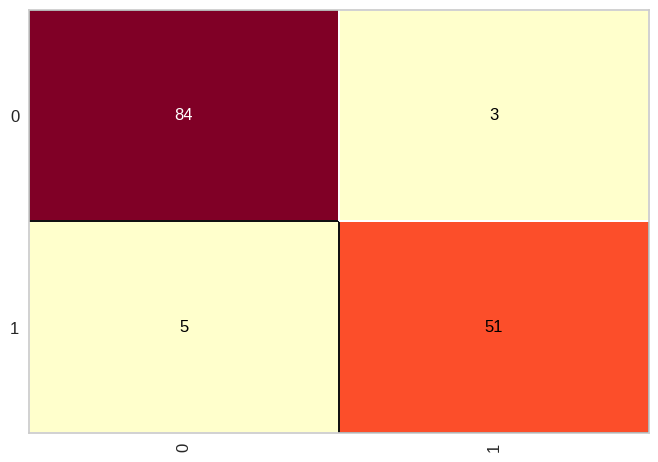

In [125]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [126]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        87
           1       0.94      0.91      0.93        56

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### **sklearn.naive_bayes.BernoulliNB**

In [136]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(force_alpha=True)
clf.fit(X_train, y_train)
previsoes = clf.predict(X_test)

0.951048951048951

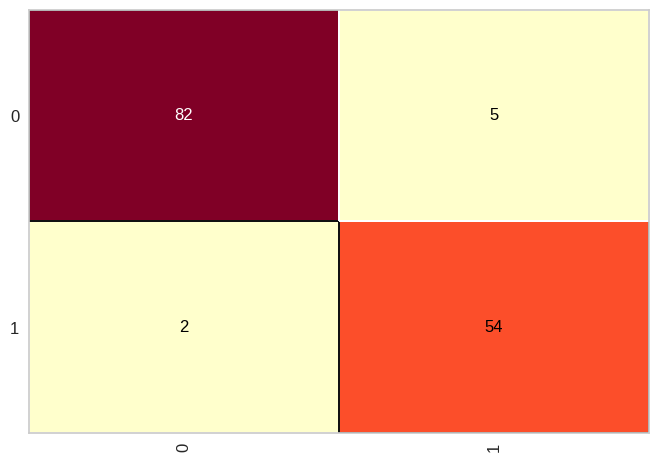

In [137]:
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [138]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        87
           1       0.92      0.96      0.94        56

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

